In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier, BaggingClassifier
import pydotplus
import graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image
% matplotlib inline

In [2]:
df2016 = pd.read_html('https://www.footballdb.com/stats/stats.html?lg=NFL&yr=2016&type=reg&mode=U&conf=&limit=all')
df2016 = df2016[0]
df2016 = pd.DataFrame(df2016)
df2016.columns = ['Player', 'Team', 'Punts', 'Punting Yards', 'Gross Punting Average', 'Longest Punt',
              'Touchbacks', 'Punts Inside Opponents 20 Yard Line', 'Punts Out Of Bounds', 'Punts Fair Caught',
             'Punts Downed', 'Punts Blocked', 'Net Punting Average', 'Punts Returned', 
              'Punt Return Yards', 'Punt Return Touchdowns']

In [3]:
df2017 = pd.read_html('https://www.footballdb.com/stats/stats.html?lg=NFL&yr=2017&type=reg&mode=U&conf=&limit=all')
df2017 = df2017[0]
df2017 = pd.DataFrame(df2017)
df2017.columns = ['Player', 'Team', 'Punts', 'Punting Yards', 'Gross Punting Average', 'Longest Punt',
              'Touchbacks', 'Punts Inside Opponents 20 Yard Line', 'Punts Out Of Bounds', 'Punts Fair Caught',
             'Punts Downed', 'Punts Blocked', 'Net Punting Average', 'Punts Returned', 
              'Punt Return Yards', 'Punt Return Touchdowns']

In [4]:
pff = pd.read_html('https://www.pro-football-reference.com/play-index/psl_finder.cgi?request=1&match=single&year_min=2016&year_max=2016&season_start=1&season_end=-1&league_id=NFL&is_active=Y&pos%5B%5D=p&draft_year_min=1936&draft_year_max=2017&draft_slot_min=1&draft_slot_max=500&draft_pick_in_round=pick_overall&conference=any&draft_pos%5B%5D=qb&draft_pos%5B%5D=rb&draft_pos%5B%5D=wr&draft_pos%5B%5D=te&draft_pos%5B%5D=e&draft_pos%5B%5D=t&draft_pos%5B%5D=g&draft_pos%5B%5D=c&draft_pos%5B%5D=ol&draft_pos%5B%5D=dt&draft_pos%5B%5D=de&draft_pos%5B%5D=dl&draft_pos%5B%5D=ilb&draft_pos%5B%5D=olb&draft_pos%5B%5D=lb&draft_pos%5B%5D=cb&draft_pos%5B%5D=s&draft_pos%5B%5D=db&draft_pos%5B%5D=k&draft_pos%5B%5D=p&c1stat=ret_yds&c1comp=gt&c2stat=punt_yds&c2comp=gt&c3stat=punt_yds&c3comp=gt&c5val=1.0&order_by=punt&order_by_asc=Y%27')
pff = pff[0]
pff2016 = pd.DataFrame(pff)

In [5]:
pff2016.columns = ['Rank', 'Player Name', 'Year', 'Age', 'Drafted', 'Team', 'League',
               'Games Playes', 'Off or Def Start', 'Punts', 'Punt Yardage', 
               'Yards Per Punt', 'Blocked Punts', 'Touch', 'Total Offense', 'Yards From Scrimmage', 
               'All Purpose Yards', 'Punt and Kick Return Yardage']

In [6]:
pff = pd.read_html('https://www.pro-football-reference.com/play-index/psl_finder.cgi?request=1&match=single&year_min=2017&year_max=2017&season_start=1&season_end=-1&league_id=NFL&is_active=Y&pos%5B%5D=p&draft_year_min=1936&draft_year_max=2017&draft_slot_min=1&draft_slot_max=500&draft_pick_in_round=pick_overall&conference=any&draft_pos%5B%5D=qb&draft_pos%5B%5D=rb&draft_pos%5B%5D=wr&draft_pos%5B%5D=te&draft_pos%5B%5D=e&draft_pos%5B%5D=t&draft_pos%5B%5D=g&draft_pos%5B%5D=c&draft_pos%5B%5D=ol&draft_pos%5B%5D=dt&draft_pos%5B%5D=de&draft_pos%5B%5D=dl&draft_pos%5B%5D=ilb&draft_pos%5B%5D=olb&draft_pos%5B%5D=lb&draft_pos%5B%5D=cb&draft_pos%5B%5D=s&draft_pos%5B%5D=db&draft_pos%5B%5D=k&draft_pos%5B%5D=p&c1stat=ret_yds&c1comp=gt&c2stat=punt_yds&c2comp=gt&c3stat=punt_yds&c3comp=gt&c5val=1.0&order_by=punt&order_by_asc=Y%27')
pff = pff[0]
pff2017 = pd.DataFrame(pff)

In [7]:
pff2017.columns = ['Rank', 'Player Name', 'Year', 'Age', 'Drafted', 'Team', 'League',
               'Games Playes', 'Off or Def Start', 'Punts', 'Punt Yardage', 
               'Yards Per Punt', 'Blocked Punts', 'Touch', 'Total Offense', 'Yards From Scrimmage', 
               'All Purpose Yards', 'Punt and Kick Return Yardage']

In [8]:
df2016 = df2016.append({'Player': 'Michael Palardy', 'Team': 'CAR', 'Punts': 36, 'Punting Yards': 1531.0, 'Gross Punting Average': 42.5,
               'Longest Punt': 56, 'Touchbacks': 2, 'Punts Inside Opponents 20 Yard Line': 13,
               'Punts Out Of Bounds': 0, 'Punts Fair Caught': 6, 'Punts Downed': 7,
               'Punts Blocked':0, 'Net Punting Average':37.90, 'Punts Returned': 21,
               'Punt Return Yards': 126}, ignore_index=True)

In [9]:
df2017.sort_values('Player', inplace=True)

In [10]:
df2017.sort_index()

,Player,Team,Punts,Punting Yards,Gross Punting Average,Longest Punt,Touchbacks,Punts Inside Opponents 20 Yard Line,Punts Out Of Bounds,Punts Fair Caught,Punts Downed,Punts Blocked,Net Punting Average,Punts Returned,Punt Return Yards,Punt Return Touchdowns
0,Brett KernB. Kern,TEN,75,3728,49.7,74,5,28,16,9,5,0,44.6,40,286,0
1,Shane LechlerS. Lechler,HOU,92,4507,49.0,68,5,32,8,22,8,0,41.3,49,608,1
2,Drew KaserD. Kaser,LAC,74,3558,48.1,69,9,27,4,6,7,0,41.3,48,319,0
3,Johnny HekkerJ. Hekker,LA,65,3113,47.9,70,4,30,16,12,8,0,44.3,25,152,0
4,Britton ColquittB. Colquitt,CLE,80,3811,47.6,67,2,24,5,13,15,1,40.6,45,482,0
5,Marquette KingM. King,OAK,69,3270,47.4,65,6,28,6,15,10,0,42.7,32,205,0
6,Andy LeeA. Lee,ARI,88,4159,47.3,63,8,29,6,13,13,0,39.7,48,506,0
7,Thomas MorsteadT. Morstead,NO,60,2822,47.0,68,2,26,7,18,9,0,42.2,24,249,1
8,Pat O'DonnellP. O'Donnell,CHI,87,4087,47.0,69,6,27,8,15,9,0,39.7,49,512,1
9,Kevin HuberK. Huber,CIN,88,4101,46.6,63,3,32,7,23,12,1,40.8,43,410,1


In [12]:
df2017['Player'] = ['Brad Nortman', 'Chris Jones', 'Donnie Jones', 'Johnny Hekker', 'Brad Wing', 'Kevin Huber', 'Dustin Colquitt',
 'Bryan Anger','Colton Schmidt', 'Brett Kern', 'Shane Lechler', 'Bradley Pinion', 'Jon Ryan', 'Drew Kaser', 'Ryan Allen',
 'Marquette King','Rigoberto Sanchez', 'Matt Haack', 'Andy Lee', 'Riley Dixon', 'Justin Vogel', 'Tress Way', 'Sam Koch',
 'Ryan Quigley', 'Colton Schmidt', 'Thomas Morstead', 'Matthew Bosher', 'Michael Palardy', 'Jordan Berry',
 'Lac Edwards', "Pat O'Donnell", 'Britton Colquitt']

In [13]:
df2017['Drafted'] = ['6-207', 0, '7-224', 0, 0, '5-142', '3-99', '3-70', 0, 0, '5-142', '5-165', 0, '6-179', 0, 0, 0,
                     0, '6-188', '7-228', 0, 0, '6-203', 0, 0, '5-164', '6-192', 0, 0, '7-235', '6-191', 0]

In [14]:
df2017.isnull().sum()

Player                                 0
Team                                   0
Punts                                  0
Punting Yards                          0
Gross Punting Average                  0
Longest Punt                           0
Touchbacks                             0
Punts Inside Opponents 20 Yard Line    0
Punts Out Of Bounds                    0
Punts Fair Caught                      0
Punts Downed                           0
Punts Blocked                          0
Net Punting Average                    0
Punts Returned                         0
Punt Return Yards                      0
Punt Return Touchdowns                 0
Drafted                                0
dtype: int64

In [15]:
df2016 = df2016.append({'Player' : 'Andy Lee', 'Team' : 'CAR', 'Punts': 36, 'Punting Yards' : 1769, 'Gross Punting Average' : 49.1,
       'Longest Punt' : 76, 'Touchbacks' : 4, 'Punts Inside Opponents 20 Yard Line': 18,
       'Punts Out Of Bounds': 1, 'Punts Fair Caught' : 7, 'Punts Downed': 7,
       'Punts Blocked' : 0, 'Net Punting Average' : 40.4, 'Punts Returned' : 17,
       'Punt Return Yards' : 236, 'Punt Return Touchdowns' : 1}, ignore_index=True)

In [16]:
df2016 = df2016.append({'Player' : 'Drew Butler', 'Team' : 'ARI', 'Punts': 32, 'Punting Yards' : 1350, 'Gross Punting Average' : 42.2,
       'Longest Punt' : 62, 'Touchbacks' : 0, 'Punts Inside Opponents 20 Yard Line': 10,
       'Punts Out Of Bounds': 0, 'Punts Fair Caught' : 8, 'Punts Downed': 2,
       'Punts Blocked' : 0, 'Net Punting Average' : 35.6, 'Punts Returned' : 20,
       'Punt Return Yards' : 210, 'Punt Return Touchdowns' : 0}, ignore_index=True)

In [17]:
df2016.tail()

,Player,Team,Punts,Punting Yards,Gross Punting Average,Longest Punt,Touchbacks,Punts Inside Opponents 20 Yard Line,Punts Out Of Bounds,Punts Fair Caught,Punts Downed,Punts Blocked,Net Punting Average,Punts Returned,Punt Return Yards,Punt Return Touchdowns
28,Jeff LockeJ. Locke,MIN,74,3155.0,42.6,72,3,34,3,28,14,0,39.0,26,209,0.0
29,Colton SchmidtC. Schmidt,BUF,75,3183.0,42.4,58,3,20,18,8,7,0,38.1,39,262,0.0
30,Michael Palardy,CAR,36,1531.0,42.5,56,2,13,0,6,7,0,37.9,21,126,NaN
31,Andy Lee,CAR,36,1769.0,49.1,76,4,18,1,7,7,0,40.4,17,236,1.0
32,Drew Butler,ARI,32,1350.0,42.2,62,0,10,0,8,2,0,35.6,20,210,0.0


In [18]:
df2016.sort_values('Team')

,Player,Team,Punts,Punting Yards,Gross Punting Average,Longest Punt,Touchbacks,Punts Inside Opponents 20 Yard Line,Punts Out Of Bounds,Punts Fair Caught,Punts Downed,Punts Blocked,Net Punting Average,Punts Returned,Punt Return Yards,Punt Return Touchdowns
32,Drew Butler,ARI,32,1350.0,42.2,62,0,10,0,8,2,0,35.6,20,210,0.0
6,Matt BosherM. Bosher,ATL,44,2060.0,46.8,68,1,21,1,16,5,0,41.6,21,209,0.0
14,Sam KochS. Koch,BAL,80,3665.0,45.8,68,5,37,18,14,10,0,39.9,33,375,1.0
29,Colton SchmidtC. Schmidt,BUF,75,3183.0,42.4,58,3,20,18,8,7,0,38.1,39,262,0.0
30,Michael Palardy,CAR,36,1531.0,42.5,56,2,13,0,6,7,0,37.9,21,126,NaN
31,Andy Lee,CAR,36,1769.0,49.1,76,4,18,1,7,7,0,40.4,17,236,1.0
23,Pat O'DonnellP. O'Donnell,CHI,68,2994.0,44.0,67,5,24,5,31,5,0,38.4,22,282,1.0
8,Kevin HuberK. Huber,CIN,78,3613.0,46.3,72,8,23,4,20,8,0,39.5,38,369,0.0
17,Britton ColquittB. Colquitt,CLE,83,3761.0,45.3,65,2,22,4,23,9,0,40.3,45,376,0.0
12,Chris JonesC. Jones,DAL,58,2661.0,45.9,66,4,25,10,17,5,1,40.5,22,192,0.0


In [19]:
pb = pd.read_html('https://www.pro-football-reference.com/play-index/psl_finder.cgi?request=1&match=single&year_min=2016&year_max=2016&season_start=1&season_end=-1&pos%5B%5D=p&draft_year_min=1936&draft_year_max=2017&draft_slot_min=1&draft_slot_max=500&draft_pick_in_round=pick_overall&conference=any&draft_pos%5B%5D=qb&draft_pos%5B%5D=rb&draft_pos%5B%5D=wr&draft_pos%5B%5D=te&draft_pos%5B%5D=e&draft_pos%5B%5D=t&draft_pos%5B%5D=g&draft_pos%5B%5D=c&draft_pos%5B%5D=ol&draft_pos%5B%5D=dt&draft_pos%5B%5D=de&draft_pos%5B%5D=dl&draft_pos%5B%5D=ilb&draft_pos%5B%5D=olb&draft_pos%5B%5D=lb&draft_pos%5B%5D=cb&draft_pos%5B%5D=s&draft_pos%5B%5D=db&draft_pos%5B%5D=k&draft_pos%5B%5D=p&c1stat=seasons&c1comp=gt&c5val=1.0&order_by=all_pros_first_team')
pb = pd.DataFrame(pb[0])
pb.columns = ['Rank', 'Player', 'Year', 'Age', 'Draft', 'Team', 'League', 'Games', 'OffDef Start', 'Years', 'ProBowl', 
              'All_Pro', 'Value']

In [20]:
pb.sort_values('Player', inplace=True)

In [21]:
pb.sort_values('Team',inplace=True)

In [22]:
df2016.sort_values('Team')

,Player,Team,Punts,Punting Yards,Gross Punting Average,Longest Punt,Touchbacks,Punts Inside Opponents 20 Yard Line,Punts Out Of Bounds,Punts Fair Caught,Punts Downed,Punts Blocked,Net Punting Average,Punts Returned,Punt Return Yards,Punt Return Touchdowns
32,Drew Butler,ARI,32,1350.0,42.2,62,0,10,0,8,2,0,35.6,20,210,0.0
6,Matt BosherM. Bosher,ATL,44,2060.0,46.8,68,1,21,1,16,5,0,41.6,21,209,0.0
14,Sam KochS. Koch,BAL,80,3665.0,45.8,68,5,37,18,14,10,0,39.9,33,375,1.0
29,Colton SchmidtC. Schmidt,BUF,75,3183.0,42.4,58,3,20,18,8,7,0,38.1,39,262,0.0
30,Michael Palardy,CAR,36,1531.0,42.5,56,2,13,0,6,7,0,37.9,21,126,NaN
31,Andy Lee,CAR,36,1769.0,49.1,76,4,18,1,7,7,0,40.4,17,236,1.0
23,Pat O'DonnellP. O'Donnell,CHI,68,2994.0,44.0,67,5,24,5,31,5,0,38.4,22,282,1.0
8,Kevin HuberK. Huber,CIN,78,3613.0,46.3,72,8,23,4,20,8,0,39.5,38,369,0.0
17,Britton ColquittB. Colquitt,CLE,83,3761.0,45.3,65,2,22,4,23,9,0,40.3,45,376,0.0
12,Chris JonesC. Jones,DAL,58,2661.0,45.9,66,4,25,10,17,5,1,40.5,22,192,0.0


In [23]:
df2016.sort_values('Team')

,Player,Team,Punts,Punting Yards,Gross Punting Average,Longest Punt,Touchbacks,Punts Inside Opponents 20 Yard Line,Punts Out Of Bounds,Punts Fair Caught,Punts Downed,Punts Blocked,Net Punting Average,Punts Returned,Punt Return Yards,Punt Return Touchdowns
32,Drew Butler,ARI,32,1350.0,42.2,62,0,10,0,8,2,0,35.6,20,210,0.0
6,Matt BosherM. Bosher,ATL,44,2060.0,46.8,68,1,21,1,16,5,0,41.6,21,209,0.0
14,Sam KochS. Koch,BAL,80,3665.0,45.8,68,5,37,18,14,10,0,39.9,33,375,1.0
29,Colton SchmidtC. Schmidt,BUF,75,3183.0,42.4,58,3,20,18,8,7,0,38.1,39,262,0.0
30,Michael Palardy,CAR,36,1531.0,42.5,56,2,13,0,6,7,0,37.9,21,126,NaN
31,Andy Lee,CAR,36,1769.0,49.1,76,4,18,1,7,7,0,40.4,17,236,1.0
23,Pat O'DonnellP. O'Donnell,CHI,68,2994.0,44.0,67,5,24,5,31,5,0,38.4,22,282,1.0
8,Kevin HuberK. Huber,CIN,78,3613.0,46.3,72,8,23,4,20,8,0,39.5,38,369,0.0
17,Britton ColquittB. Colquitt,CLE,83,3761.0,45.3,65,2,22,4,23,9,0,40.3,45,376,0.0
12,Chris JonesC. Jones,DAL,58,2661.0,45.9,66,4,25,10,17,5,1,40.5,22,192,0.0


In [24]:
pb.drop([35, 30, 28, 20, 11], inplace=True)

In [25]:
pb2017 = pb.sort_values('Team')

In [26]:
df2016.drop([3], inplace=True)

In [27]:
df2016['Player'] = list(pb['Player'])

In [28]:
df2016['Drafted'] = list(pb['Draft'])

In [29]:
df2016['Drafted'].fillna(0, inplace=True)

In [30]:
df2016['ProBowl'] = list(pb['ProBowl'])

In [31]:
df2016['ProBowl'].fillna(0, inplace=True)

In [32]:
df2016.sort_values('Team', inplace=True)

In [33]:
df2016.fillna(0, inplace=True)

In [34]:
df2016['ProBowl'] = df2016.ProBowl.astype(int)

In [35]:
df2016['Drafted'] = [0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]

In [36]:
df2017['Drafted'] = [1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0]

In [37]:
pb17 = pd.read_html('https://www.pro-football-reference.com/play-index/psl_finder.cgi?request=1&match=single&year_min=2017&year_max=2017&season_start=1&season_end=-1&pos%5B%5D=p&draft_year_min=1936&draft_year_max=2017&draft_slot_min=1&draft_slot_max=500&draft_pick_in_round=pick_overall&conference=any&draft_pos%5B%5D=qb&draft_pos%5B%5D=rb&draft_pos%5B%5D=wr&draft_pos%5B%5D=te&draft_pos%5B%5D=e&draft_pos%5B%5D=t&draft_pos%5B%5D=g&draft_pos%5B%5D=c&draft_pos%5B%5D=ol&draft_pos%5B%5D=dt&draft_pos%5B%5D=de&draft_pos%5B%5D=dl&draft_pos%5B%5D=ilb&draft_pos%5B%5D=olb&draft_pos%5B%5D=lb&draft_pos%5B%5D=cb&draft_pos%5B%5D=s&draft_pos%5B%5D=db&draft_pos%5B%5D=k&draft_pos%5B%5D=p&c1stat=seasons&c1comp=gt&c5val=1.0&order_by=all_pros_first_team')
pb17 = pd.DataFrame(pb17[0])
pb17.columns = ['Rank', 'Player', 'Year', 'Age', 'Draft', 'Team', 'League', 'Games', 
'OffDef Start', 'Years', 'ProBowl', 
'All_Pro', 'Value']

In [38]:
pb17.sort_values('Team', inplace=True)

In [39]:
df2017.sort_values('Team', inplace=True)

In [40]:
pb17.drop([20, 19, 28], inplace=True)

In [41]:
df2017['Player'] = list(pb17['Player'])

In [42]:
df2017['ProBowl'] = list(pb17['ProBowl'])

In [43]:
df2017.reset_index(inplace=True)

In [44]:
df2017.drop('index', axis=1, inplace=True)

In [45]:
df2016.reset_index(inplace=True)

In [46]:
df2016.drop('index', axis=1, inplace=True)

In [95]:
df2016['RedZone_Percentage'] = df2016['Punts Inside Opponents 20 Yard Line'] / df2016.Punts

In [96]:
df2017['RedZone_Percentage'] = df2017['Punts Inside Opponents 20 Yard Line'] / df2017.Punts

In [47]:
df2016.to_csv('./df2016.csv')

In [48]:
df2017.to_csv('./df2017.csv')

In [49]:
df = [df2016, df2017]

In [50]:
df = pd.concat(df)

In [51]:
df['RedZone_Percentage'] = df['Punts Inside Opponents 20 Yard Line'] / df.Punts

In [52]:
df['Fair Catch Percentage'] = df['Punts Fair Caught'] / df.Punts

In [53]:
df['ProBowl']= df.ProBowl.astype(int)

In [54]:
df.head()

,Player,Team,Punts,Punting Yards,Gross Punting Average,Longest Punt,Touchbacks,Punts Inside Opponents 20 Yard Line,Punts Out Of Bounds,Punts Fair Caught,Punts Downed,Punts Blocked,Net Punting Average,Punts Returned,Punt Return Yards,Punt Return Touchdowns,Drafted,ProBowl,RedZone_Percentage,Fair Catch Percentage
0,Tress Way,ARI,32,1350.0,42.2,62,0,10,0,8,2,0,35.6,20,210,0.0,0,0,0.312500,0.250000
1,Pat O'Donnell,ATL,44,2060.0,46.8,68,1,21,1,16,5,0,41.6,21,209,0.0,0,0,0.477273,0.363636
2,Pat McAfee,BAL,80,3665.0,45.8,68,5,37,18,14,10,0,39.9,33,375,1.0,1,1,0.462500,0.175000
3,Bradley Pinion,BUF,75,3183.0,42.4,58,3,20,18,8,7,0,38.1,39,262,0.0,1,0,0.266667,0.106667
4,Bryan Anger,CAR,36,1531.0,42.5,56,2,13,0,6,7,0,37.9,21,126,0.0,0,0,0.361111,0.166667


## EDA

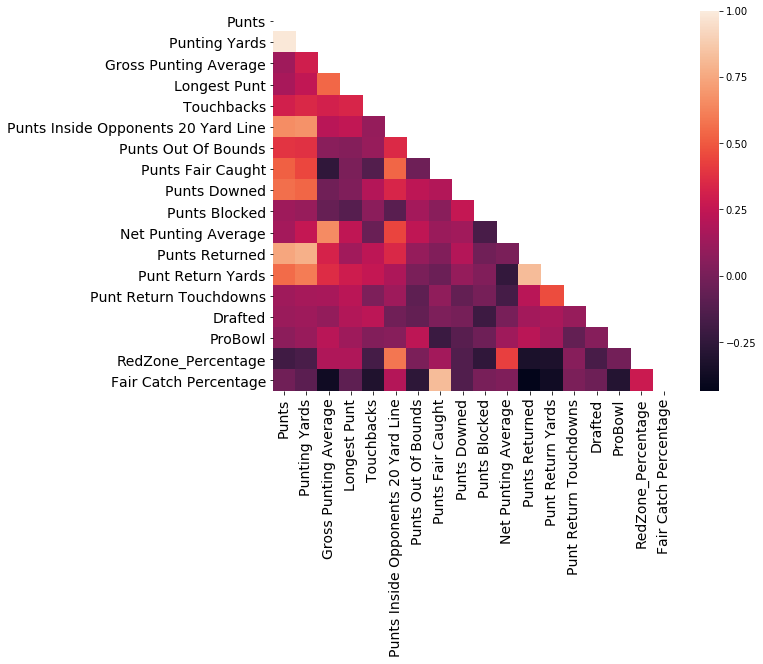

In [55]:
fig, ax = plt.subplots(figsize=(9,7))
mean_corr = df.drop(['Player', 'Team'], axis=1).corr()
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(mean_corr, mask=mask, ax=ax)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)
plt.show()

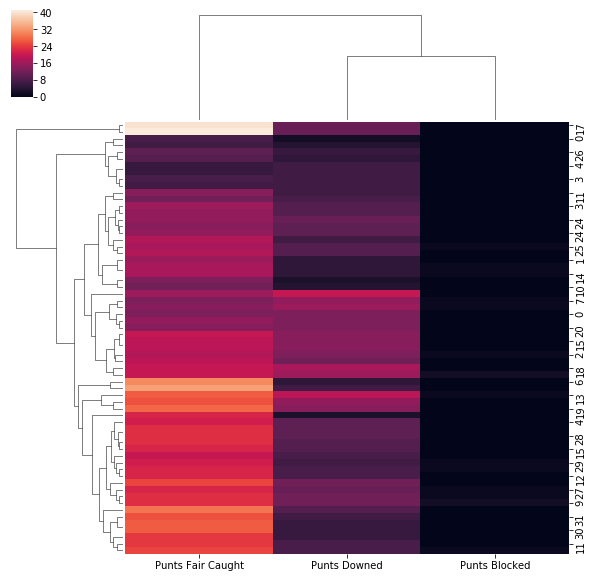

In [59]:
sns.clustermap(df[['Punts Fair Caught', 'Punts Downed','Punts Blocked']]);

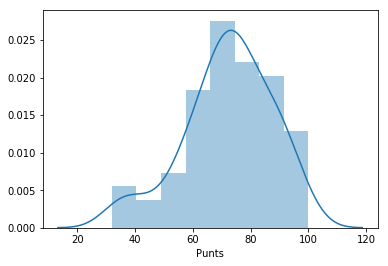

In [60]:
sns.distplot(df.Punts);

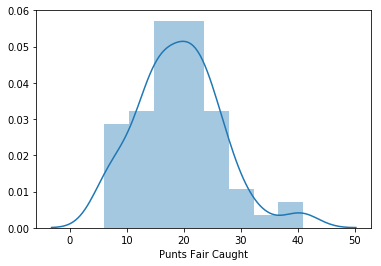

In [61]:
sns.distplot(df['Punts Fair Caught']);

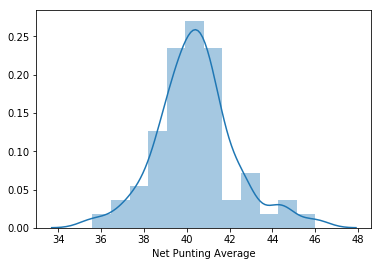

In [62]:
sns.distplot(df['Net Punting Average']);

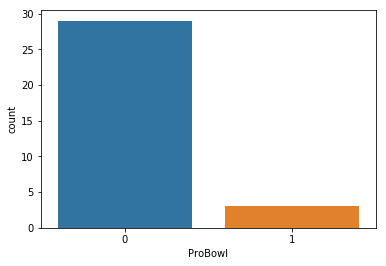

In [64]:
sns.countplot(x='ProBowl', data=df2016);

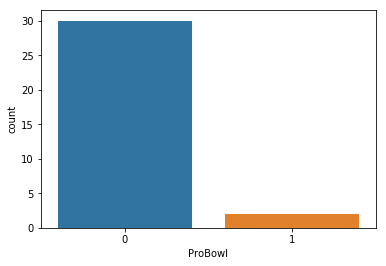

In [65]:
sns.countplot(x='ProBowl', data=df2017);

## Decision Trees
### 2016

In [97]:
y = df2016.ProBowl
X = df2016.drop(['Player', 'Team', 'ProBowl', 'Punts Returned', 'Punt Return Yards'], axis=1)

In [98]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=41)

In [99]:
dt = DecisionTreeClassifier(min_samples_split=4)

In [100]:
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [101]:
preds = dt.predict(X)

In [103]:
from sklearn.metrics import classification_report
preds = dt.predict(X)
print(classification_report(y, preds))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98        29
          1       1.00      0.67      0.80         3

avg / total       0.97      0.97      0.97        32



In [104]:
s = cross_val_score(dt, X, y, cv=cv, n_jobs=-1)

In [105]:
print("{} Score:\t{:0.3} ± {:0.3}".format("Decision Tree", s.mean().round(3), s.std().round(3)))

Decision Tree Score:	0.873 ± 0.051


In [106]:
bt = BaggingClassifier()
s = cross_val_score(bt, X, y, cv=cv, n_jobs=-1)

In [107]:
print(s.mean())

0.8424242424242424


In [108]:
print("{} Score:\t{:0.3} ± {:0.3}".format("Decision Tree", s.mean().round(3), s.std().round(3)))

Decision Tree Score:	0.842 ± 0.048


In [109]:
rf = RandomForestClassifier(min_impurity_decrease=2)
rf.fit(X, y)
s = cross_val_score(rf, X, y, cv=cv, n_jobs=-1)
print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest", s.mean().round(3), s.std().round(3)))

Random Forest Score:	0.906 ± 0.004


In [110]:
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [111]:
preds = rf.predict(X)
print(classification_report(y, preds))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95        29
          1       0.00      0.00      0.00         3

avg / total       0.82      0.91      0.86        32



/Users/dfreema1/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [112]:
dot_data = StringIO()
export_graphviz(dt.fit(X,y), out_file='dot_data.dot',  
              filled=True, rounded=True,
              special_characters=True,
              feature_names=list(X.columns))  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


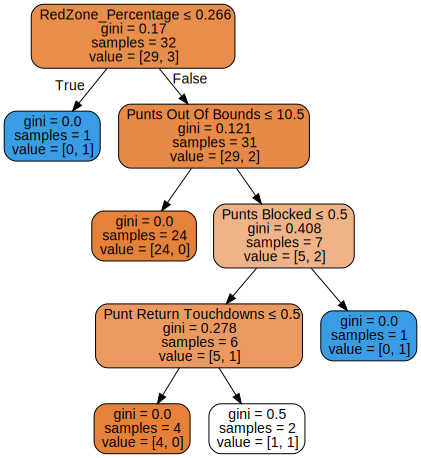

In [113]:
with open("dot_data.dot") as f:
        dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 2017

In [114]:
y = df2017.ProBowl
X1 = df2017.drop(['Player', 'Team', 'ProBowl', 'Punts Returned', 'Punt Return Yards'], axis=1)

In [115]:
y=y.astype('int')

In [116]:
dt1 = DecisionTreeClassifier()
bt1 = BaggingClassifier()
rf1 = RandomForestClassifier(min_impurity_decrease=2)

In [117]:
s1 = cross_val_score(dt1, X1, y, cv=cv, n_jobs=-1)
s2 = cross_val_score(bt1, X1, y, cv=cv, n_jobs=-1)
s3 = cross_val_score(rf1, X1, y, cv=cv, n_jobs=-1)

/Users/dfreema1/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/dfreema1/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/dfreema1/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [118]:
dt1.fit(X1,y)
bt1.fit(X1,y)
rf1.fit(X1,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=2, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [119]:
preds = rf1.predict(X1)
print(classification_report(y, preds))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97        30
          1       0.00      0.00      0.00         2

avg / total       0.88      0.94      0.91        32



/Users/dfreema1/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [120]:
print("{} Score:\t{:0.3} ± {:0.3}".format("Decision Tree", s1.mean().round(3), s1.std().round(3)))
print("{} Score:\t{:0.3} ± {:0.3}".format("Bagging Classifier", s2.mean().round(3), s2.std().round(3)))
print("{} Score:\t{:0.3} ± {:0.3}".format("Random Forest Classifier", s3.mean().round(3), s3.std().round(3)))

Decision Tree Score:	0.939 ± 0.086
Bagging Classifier Score:	0.97 ± 0.043
Random Forest Classifier Score:	0.939 ± 0.043


In [121]:
dot_data = StringIO()
export_graphviz(dt1.fit(X1,y), out_file='12017.dot',  
              filled=True, rounded=True,
              special_characters=True,
              feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


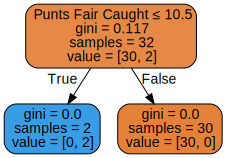

In [122]:
with open("12017.dot") as f:
        dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [123]:
logreg = LogisticRegression()
cross_val_score(logreg, X1, y, cv=6, scoring='accuracy').mean()

/Users/dfreema1/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)


0.9444444444444445

In [124]:
logreg.fit(X1, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
preds = (logreg.predict(X1))

In [126]:
cross_val_score(logreg, X1, y, cv=6, scoring='accuracy').mean()

/Users/dfreema1/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)


0.9444444444444445

### Summary:

I would summarized and suggest to acquire a punter that has a high number of Fair Catches and someone who has high redzone precentage. 